# Plotting in Julia

# PyPlot

Wrapper to [`matplotlib`](https://matplotlib.org/index.html), the well-kown python plotting library. My personal suggestion. Based on `PyCall.jl`.

In [1]:
using PyPlot

The syntax is exactly the same as in python.

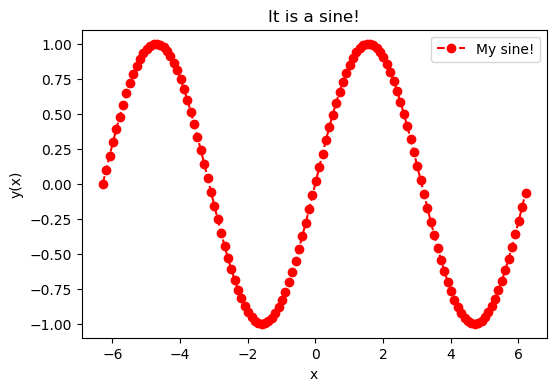

In [36]:
figure(figsize=(6,4))
x = -2π:0.1:2π
y = sin.(x)
plot(x,y, "ro--", label="My sine!")
xlabel("x")
ylabel("y(x)")
title("It is a sine!");
legend();

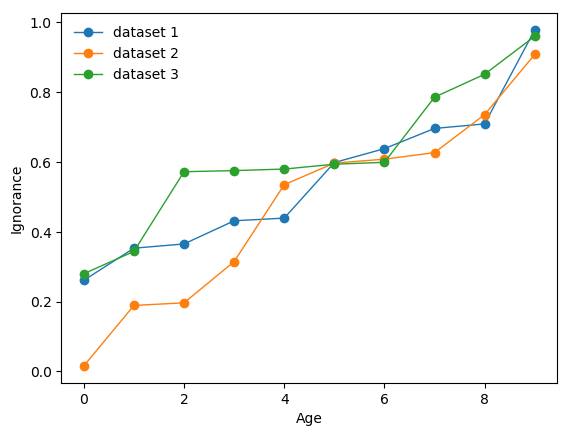

PyObject Text(24,0.5,'Ignorance')

In [27]:
fakedata = sort(rand(10,3), dims=1)

for k in 1:3
    plot(fakedata[:,k], "o-", linewidth=1, label="dataset $k")
end
legend(frameon=false)

xlabel("Age")
ylabel("Ignorance")

However, there is currently one annoyance. Access to nested functionality doesn't work via "obj.myfunction" but "obj[:myfunction]", that is objects are dictionaries that contain their submethods as entries.

In [31]:
plot(1:10, rand(10))

ax = gca()
ax.set_xticks([]) # doesn't work

ErrorException: type PyObject has no field set_xticks

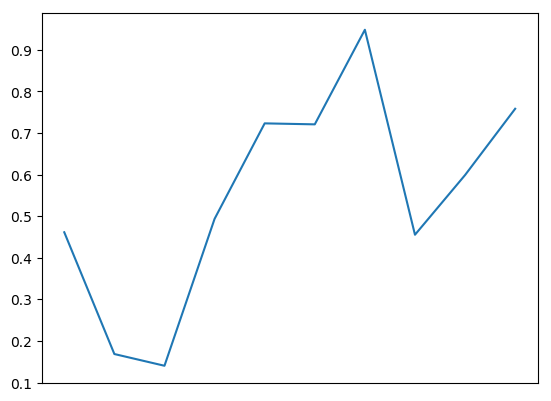

0-element Array{Any,1}

In [32]:
plot(1:10, rand(10))

ax = gca()
ax[:set_xticks]([]) # works

However, [my pull request](https://github.com/JuliaPy/PyCall.jl/pull/517) should get merged soon (few weeks max) and then this goes away!

# Plots

A meta plotting package that defines (nice!) plotting syntax (front end) for many plotting libraries (backends). It isn't a plotting library itself.

The [list of supported backends](https://docs.juliaplots.org/latest/backends/) includes

* PyPlot (mature)
* GR (less features but blazingly fast)
* Plotly, PlotlyJS (fancy, good looking, interactive)
* PGFPlots (high quality latex plots)
* UnicodePlots.

The default backend is [GR.jl](https://github.com/jheinen/GR.jl) (package maintainer is part of HPC staff in Jülich).

**In my opinion it has nice syntax, but lacks feature wrappers and a good documentation! Ok for quick plotting but wouldn't recommend it for anything serious (publications etc.)**

In [20]:
using Plots

In [21]:
Plots.backend() # the default backend is GR.jl

Plots.GRBackend()

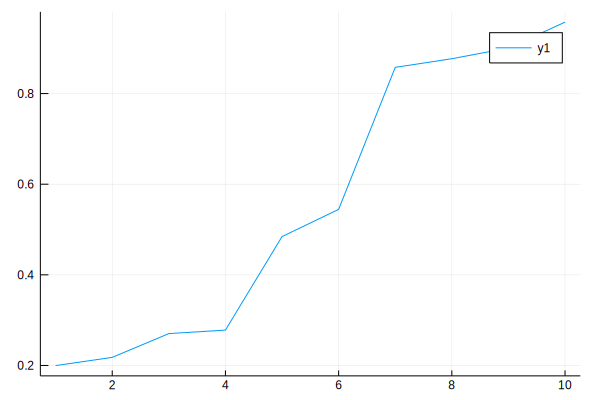

In [22]:
plot(sort(rand(10)))

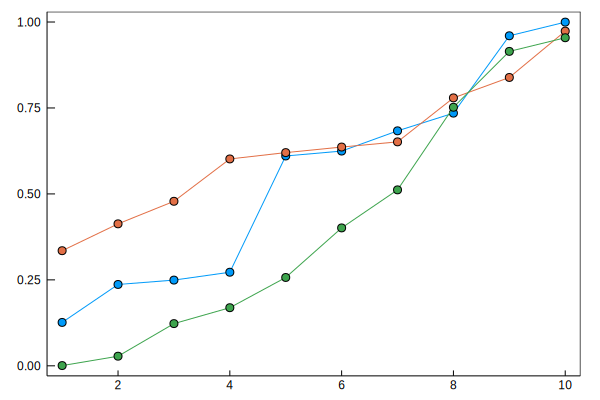

In [23]:
plot(sort(rand(10,3), dims=1), marker=:circle, legend=false, framestyle=:box, grid=false)

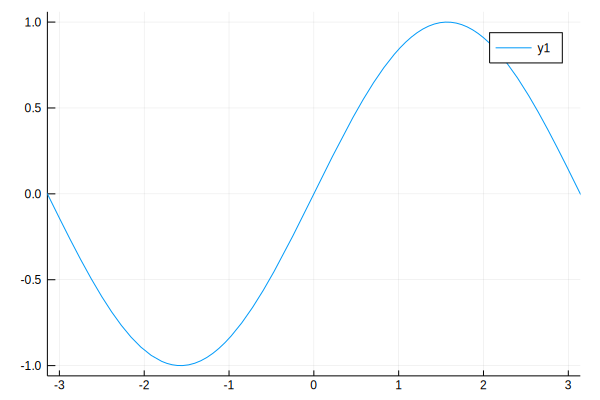

In [25]:
plot(sin, xlim=(-π, π)) # nice!

Switching the backend

In [26]:
pyplot()

Plots.PyPlotBackend()

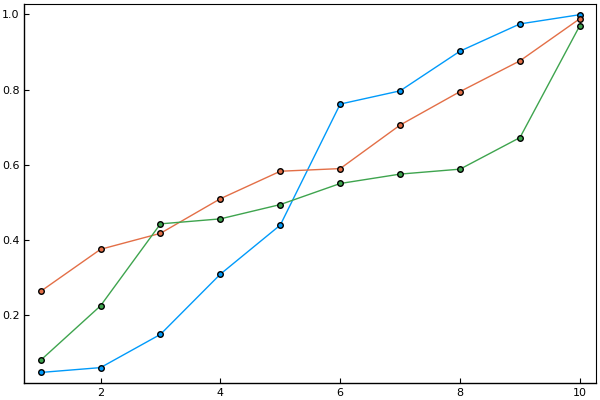

In [27]:
plot(sort(rand(10,3), dims=1), marker=:circle, legend=false, framestyle=:box, grid=false)

# Makie.jl

Based on OpenGL, developed in Berlin. Not really usable yet in the wild (really slow, not mature enough, not enough features).

**Maybe the future of native Julia plotting.**

In [ ]:
# 2D example
using Makie
scatter(rand(10), rand(10), color = rand(10))

In [ ]:
# 3D example
using Makie, LinearAlgebra

n = 20
f   = (x,y,z) -> x*exp(cos(y)*z)
∇f  = (x,y,z) -> Point3f0(exp(cos(y)*z), -sin(y)*z*x*exp(cos(y)*z), x*cos(y)*exp(cos(y)*z))
∇ˢf = (x,y,z) -> ∇f(x,y,z) - Point3f0(x,y,z)*dot(Point3f0(x,y,z), ∇f(x,y,z))

θ = [0;(0.5:n-0.5)/n;1]
φ = [(0:2n-2)*2/(2n-1);2]
x = [cospi(φ)*sinpi(θ) for θ in θ, φ in φ]
y = [sinpi(φ)*sinpi(θ) for θ in θ, φ in φ]
z = [cospi(θ) for θ in θ, φ in φ]

pts = vec(Point3f0.(x, y, z))
∇ˢF = vec(∇ˢf.(x, y, z)) .* 0.1f0
surface(x, y, z)
arrows!(
    pts, ∇ˢF,
    arrowsize = 0.03, linecolor = (:white, 0.6), linewidth = 3
)

# Other

## UnicodePlots.jl

In [70]:
using UnicodePlots

In [71]:
myPlot = lineplot([cos, sin], -π/2, 2π) # looks better in a terminal

           ┌────────────────────────────────────────┐       
         1 │⠀⠀⠀⠀⠀⠀⢀⠖⢹⠉⢢⠀⠀⢀⠞⠉⠉⢢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠞⠉⠀⠀⠀│ cos(x)
           │⠀⠀⠀⠀⠀⢠⠊⠀⢸⠀⠀⠳⣠⠊⠀⠀⠀⠀⠣⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀│ sin(x)
           │⠀⠀⠀⠀⢀⠇⠀⠀⢸⠀⠀⢠⢷⠀⠀⠀⠀⠀⠀⢱⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠇⠀⠀⠀⠀⠀⠀│       
           │⠀⠀⠀⠀⡜⠀⠀⠀⢸⠀⠀⡜⠀⢧⠀⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡎⠀⠀⠀⠀⠀⠀⠀│       
           │⠀⠀⠀⢸⠀⠀⠀⠀⢸⠀⢸⠀⠀⠘⡄⠀⠀⠀⠀⠀⠘⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⡸⠀⠀⠀⠀⠀⠀⠀⠀│       
           │⠀⠀⢀⠇⠀⠀⠀⠀⢸⢀⠇⠀⠀⠀⢱⠀⠀⠀⠀⠀⠀⢱⠀⠀⠀⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀⠀⠀⠀⠀│       
           │⠀⠀⡜⠀⠀⠀⠀⠀⢸⡜⠀⠀⠀⠀⠈⡆⠀⠀⠀⠀⠀⠈⡆⠀⠀⠀⠀⠀⠀⠀⡜⠀⠀⠀⠀⠀⠀⠀⠀⠀│       
   f(x)    │⠤⠤⠧⠤⠤⠤⠤⠤⢼⠧⠤⠤⠤⠤⠤⠼⡤⠤⠤⠤⠤⠤⠼⡤⠤⠤⠤⠤⠤⢴⠥⠤⠤⠤⠤⠤⢤⠤⠤⠄│       
           │⠀⠀⠀⠀⠀⠀⠀⠀⣿⠀⠀⠀⠀⠀⠀⠀⢣⠀⠀⠀⠀⠀⠀⢣⠀⠀⠀⠀⢀⠇⠀⠀⠀⠀⠀⢀⠇⠀⠀⠀│       
           │⠀⠀⠀⠀⠀⠀⠀⡸⢸⠀⠀⠀⠀⠀⠀⠀⠈⡆⠀⠀⠀⠀⠀⠈⡆⠀⠀⠀⡸⠀⠀⠀⠀⠀⠀⡸⠀⠀⠀⠀│       
           │⠀⠀⠀⠀⠀⠀⢀⠇⢸⠀⠀⠀⠀⠀⠀⠀⠀⢱⠀⠀⠀⠀⠀⠀⢱⠀⠀⢠⠃⠀⠀⠀⠀⠀⢠⠃⠀⠀⠀⠀│       
           │⠀⠀⠀⠀⠀⠀⡞⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⢇⠀⠀⠀⠀⠀⠀⢇⠀⡞⠀⠀⠀⠀⠀⠀⡎⠀⠀⠀⠀⠀│       
           │⠀⠀⠀⠀⠀⡸⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠘⡾⠀⠀⠀⠀⠀⠀⡸⠀⠀⠀⠀⠀⠀│       
           │⠀⠀⠀⠀⡰⠁⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⢄⠀⠀⠀⠀⡜⠙⣄⠀⠀⠀⠀⡜⠁⠀⠀⠀⠀⠀⠀│       
        -1 │⠀⢀⣀⠜⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⢦⣀⣀⠜⠀⠀⠈⢦⣀⣠⠜⠀⠀⠀⠀⠀⠀⠀⠀│       
           └────────────

## VegaLite.jl

Based on [Vega-Lite](https://vega.github.io/vega-lite/).

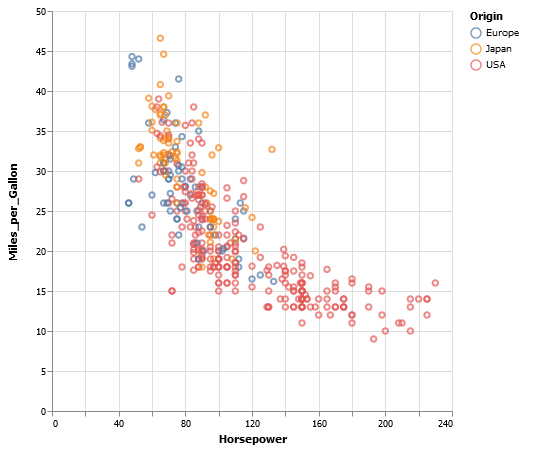

In [43]:
using VegaLite, VegaDatasets

dataset("cars") |>
@vlplot(
    :point,
    x=:Horsepower,
    y=:Miles_per_Gallon,
    color=:Origin,
    width=400,
    height=400
)

## Luxor.jl

Luxor is a Julia package for drawing simple static vector graphics.